# Topic Modeling  
As the name suggests, it is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. 

Topics can be defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model should result in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, and “farm”, “crops”, “wheat” for a topic – “Farming”.

Topic Models are very useful for the purpose for document clustering, organizing large blocks of textual data, information retrieval from unstructured text and feature selection. For Example – New York Times are using topic models to boost their user – article recommendation engines. Various professionals are using topic models for recruitment industries where they aim to extract latent features of job descriptions and map them to right candidates. They are being used to organize large datasets of emails, customer reviews, and user social media profiles.  

[Reference](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)

### Dataset: [MLK's I Have a Dream](https://www.americanrhetoric.com/speeches/mlkihaveadream.htm)

#### scraper output: [csv file and site selector](https://drive.google.com/drive/folders/1baY6-W6u0bc_uazCJEAsD8_H64x26PQ0?usp=sharing)

## 3 ways to scrape:

### 1. BeautifulSoup or Selenium
### 2. Online tools like ParseHub or webscraper.io
### 3. manually

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = "https://www.americanrhetoric.com/speeches/mlkihaveadream.htm"
page = urlopen(url)
html = page.read()
soup = BeautifulSoup(html, "html.parser")

In [2]:
print(soup.prettify())

<!DOCTYPE html public "-//w3c//dtd html 4.0 transitional//en">
<html>
 <head>
  <meta content="NO-CACHE" http-equiv="CACHE-CONTROL"/>
  <meta content="NO-CACHE" http-equiv="PRAGMA"/>
  <meta content="Martin Luther King, Jr: I Have a Dream Speech" name="Title"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Martin Luther King's I Have A Dream speech text and audio" name="description"/>
  <meta content="Global" name="Distribution"/>
  <meta content="I have a dream, I have a dream transcript, American Rhetoric, famous speeches" name="keywords"/>
  <title>
   Martin Luther King I Have a Dream Speech - American Rhetoric
  </title>
 </head>
 <body alink="#FF3300" bgcolor="#000024" leftmargin="0" link="#FFFFFF" topmargin="0" vlink="#FFFF00">
  <div align="center">
   <a href="https://www.americanrhetoric.com/">
    <img border="0" height="139" src="../images/ARLogoTop100in.jpg" style="padding-top: 0; padding-bottom: 0" width="745"/>
   </a>
   <p>
   

In [3]:
print(soup.get_text())











Martin Luther King I Have a Dream Speech - American Rhetoric





    google_ad_client = "ca-pub-4540749582151874";
    google_ad_slot = "9378812830";
    google_ad_width = 728;
    google_ad_height = 90;









 

Martin 
Luther 
King, 
Jr.
I Have a Dream
delivered 
      28 August 1963, at the Lincoln Memorial, Washington D.C.




Video Purchase




Off-Site audio mp3 of Address





Your browser does not support the audio element.
   

 
[AUTHENTICITY CERTIFIED: Text version below transcribed directly from audio. 
			(2)]
I am happy to join with you today in what will go down in history as
the greatest demonstration for freedom in the history of our nation.
Five score years ago, 
			
a great American, in whose symbolic shadow we
stand today, signed the 
			
Emancipation Proclamation. This momentous decree came as a great
beacon light of hope to millions of Negro slaves who had been seared in the flames of
withering injustice. It came as a joyous daybreak to end the long 

In [4]:
# !pip install pandasgui

In [5]:
import pandas as pd
# from pandasgui import show
# from pandasgui import wordcloud

df = pd.read_csv('data/mlk-i-have-a-dream.csv')
# gui = show(df)

In [6]:
# create word cloud using python

In [7]:
!pip install wordcloud

In [8]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [9]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'body'], dtype='object')

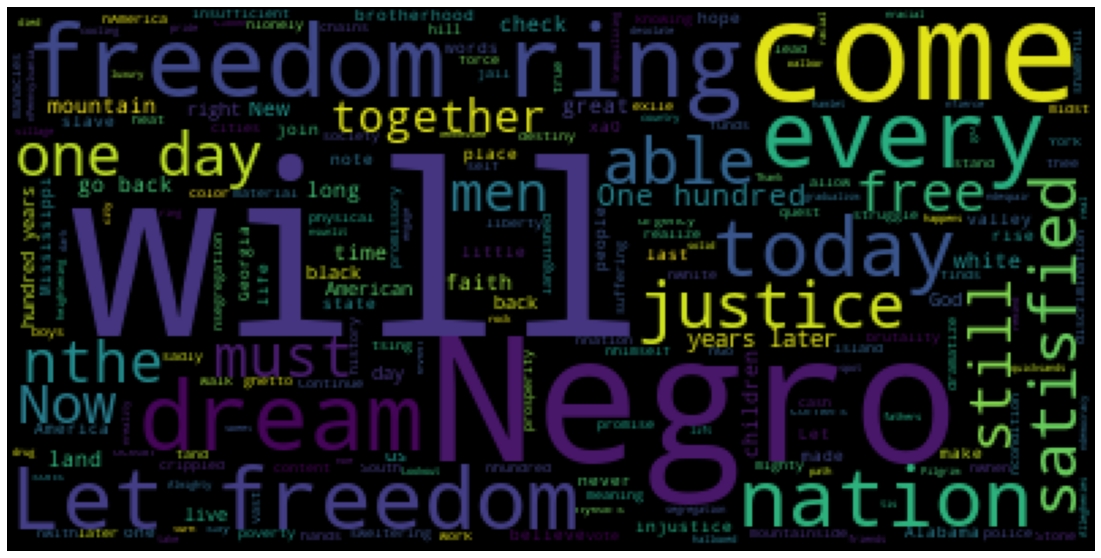

In [10]:
text = df['body'].values 

wordcloud = WordCloud().generate(str(text))


def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


plot_cloud(wordcloud)

### Import Packages

In [11]:
import pandas as pd
import numpy as np

In [12]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

from gensim.models import CoherenceModel

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Preparing Documents  
We combine these documents to form a corpus.

In [13]:
df.head()

web-scraper-order                              web-scraper-start-url  \
0     1603716909-16  https://www.americanrhetoric.com/speeches/mlki...   
1     1603716909-42  https://www.americanrhetoric.com/speeches/mlki...   
2     1603716909-43  https://www.americanrhetoric.com/speeches/mlki...   
3     1603716909-38  https://www.americanrhetoric.com/speeches/mlki...   
4     1603716909-33  https://www.americanrhetoric.com/speeches/mlki...   

                                                body  
0  Let us not wallow in the valley of\ndespair, I...  
1                        Free at last! Free at last!  
2           Thank God Almighty, we are free at last!  
3  Let freedom ring from Lookout Mountain of Tenn...  
4  Let freedom ring from the heightening Alleghen...

In [14]:
doc_complete = df['body']

### Cleaning and Preprocessing  
Remove the punctuations, stopwords and normalize the corpus.

In [15]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 
doc_clean

[['let', 'u', 'wallow', 'valley', 'despair', 'say', 'today', 'friend'],
 ['free', 'last', 'free', 'last'],
 ['thank', 'god', 'almighty', 'free', 'last'],
 ['let', 'freedom', 'ring', 'lookout', 'mountain', 'tennessee'],
 ['let', 'freedom', 'ring', 'heightening', 'allegheny', 'pennsylvania'],
 ['country',
  'ti',
  'thee',
  'sweet',
  'land',
  'liberty',
  'thee',
  'sing',
  'land',
  'father',
  'died',
  'land',
  'pilgrim',
  'pride',
  'every',
  'mountainside',
  'let',
  'freedom',
  'ring'],
 ['cannot', 'turn', 'back'],
 ['dream', 'today'],
 ['also',
  'come',
  'hallowed',
  'spot',
  'remind',
  'america',
  'fierce',
  'urgency',
  'now',
  'time',
  'engage',
  'luxury',
  'cooling',
  'take',
  'tranquilizing',
  'drug',
  'gradualism',
  'time',
  'make',
  'real',
  'promise',
  'democracy',
  'time',
  'rise',
  'dark',
  'desolate',
  'valley',
  'segregation',
  'sunlit',
  'path',
  'racial',
  'justice',
  'time',
  'lift',
  'nation',
  'quicksand',
  'racial',
  '

### Preparing Document-Term Matrix

In [16]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 2), (9, 2)],
 [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(2, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)],
 [(2, 1), (13, 1), (16, 1), (18, 1), (19, 1), (20, 1)],
 [(2, 1),
  (13, 1),
  (16, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 3),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 1)],
 [(34, 1), (35, 1), (36, 1)],
 [(4, 1), (37, 1)],
 [(6, 1),
  (11, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 5),
  (74, 1),
  (75, 1)],
 [(2, 1),
  (11, 1),
  (13, 1),
  (16, 2),
  (23, 4),
  (30, 1),
  (41, 1),
  (76, 2),
  (

### Running Latent Dirichlet Allocation (LDA) Model

In [17]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50, random_state=42)

### Elbow Method

In [18]:
perps = []
for n_topics in [1, 2, 3 ,4 ,5, 6]:
  # Creating the object for LDA model using gensim library
  Lda = gensim.models.ldamodel.LdaModel

  # Running and Training LDA model on the document term matrix.
  ldamodel_iter = Lda(doc_term_matrix, num_topics=n_topics, id2word = dictionary, passes=50, random_state=42)

  # Compute Perplexity
  perplexity = ldamodel_iter.log_perplexity(doc_term_matrix)
  print('\nPerplexity: ', perplexity)  # a measure of how good the model is. lower the better.
  
  # Store perplexity in list
  perps.append([n_topics, perplexity])


Perplexity:  -6.107413168464388

Perplexity:  -6.136475566266228

Perplexity:  -6.127483131028653

Perplexity:  -6.173998019470383

Perplexity:  -6.173408355842363

Perplexity:  -6.182641737696721


<AxesSubplot:xlabel='topics'>

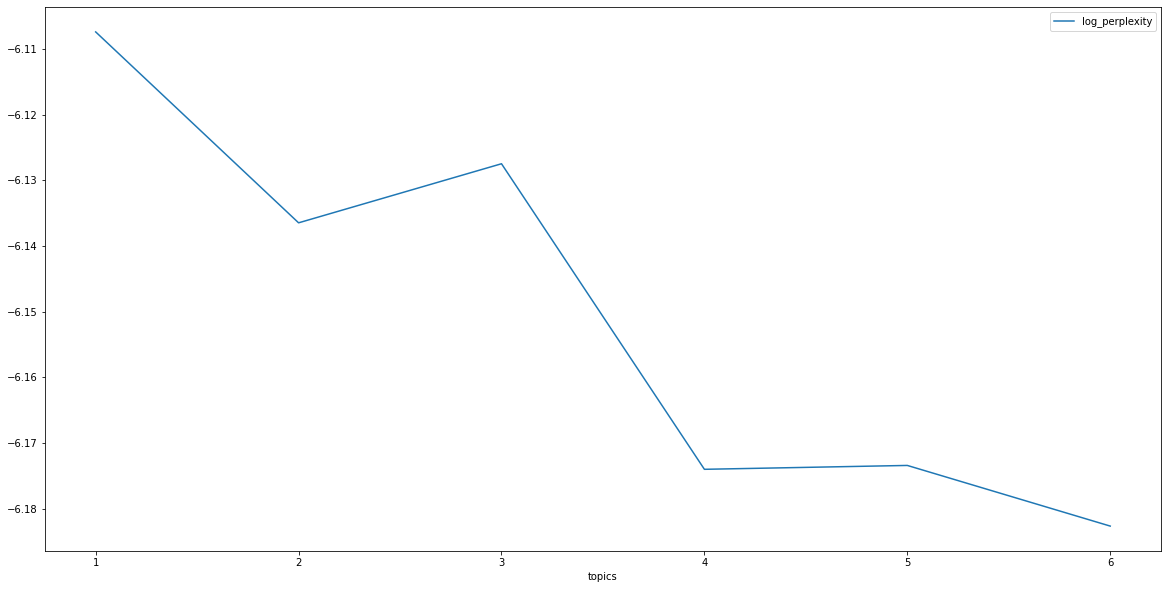

In [43]:
perps_df = pd.DataFrame(perps, columns=['topics', 'log_perplexity'])
perps_df.set_index('topics').plot(figsize=(20, 10))

### Results

### Topic-Word Distribution

In [19]:
print(ldamodel.print_topics(num_topics=4, num_words=5))

[(0, '0.021*"go" + 0.019*"negro" + 0.019*"back" + 0.019*"satisfied" + 0.014*"freedom"'), (1, '0.024*"one" + 0.017*"negro" + 0.017*"dream" + 0.015*"year" + 0.015*"hundred"'), (2, '0.034*"freedom" + 0.034*"let" + 0.034*"ring" + 0.026*"every" + 0.015*"day"')]


### Compute Perplexity and Coherence Socre

In [20]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.127483131028653

Coherence Score:  0.35042123656242036


### Visualize Topics-Keywords

In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.116472 -0.035817       1        1  44.518011
0      0.092542 -0.073295       2        1  32.254723
2      0.023931  0.109112       3        1  23.227265, topic_info=        Term       Freq      Total Category  logprob  loglift
16      ring   7.000000   7.000000  Default  30.0000  30.0000
2        let   8.000000   8.000000  Default  29.0000  29.0000
23     every   6.000000   6.000000  Default  28.0000  28.0000
13   freedom  12.000000  12.000000  Default  27.0000  27.0000
99        go   6.000000   6.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
88       men   1.333039   4.680331   Topic3  -5.0506   0.2039
6     valley   0.983013   2.567095   Topic3  -5.3552   0.4999
37     dream   1.337059   8.288799   Topic3  -5.0476  -0.3646
116      one   1.319773  12.494575   Topic3  -5.0606  -0.7880
89     negro   1.323610  13.543814   Topic3  -5.0577  -0.8657

[168 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
76        1  0.346280       able
76        2  0.346280       able
76        3  0.346280       able
39        1  0.715308    america
39        2  0.238436    america
...     ...       ...        ...
96        3  0.186678      white
299       3  0.818788  withering
227       2  1.018879       work
300       1  0.857398       year
300       3  0.142900       year

[177 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [47]:
# Save html
pyLDAvis.save_html(vis, 'lda.html')

In [48]:
# from google.colab import files
# files.download('lda.html')

So how to infer pyLDAvis’s output?

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

Alright, if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

We have successfully built a good looking topic model.